# Analysis of Recorded Data on Vibrations 

This subproject has the following goals: 
1. learn from data on how to inform / improve models; 

The measured data referred to in this section is measured using inertial measurements units (IMUs). These devices measure three translation degrees of freedom (translation in $x$, $y$ and $z$-direction) and three rotational degrees of freedom. More information on these devices can be found [here](https://en.wikipedia.org/wiki/Inertial_measurement_unit). 

## Import Packages

In [3]:
using CSV  # reading data
#using FFTW # Fourier analysis 
#using SignalAnalysis # Power Density Spectra 
using SparseArrays
using Plots
#using LaTeXStrings
using BenchmarkTools 

## Section 1/: Introduction 

- generate data from simplified model
- document how to model road conditions (cfr. book on motorcycles)
- describe raw data of time-traces of acceleration of two doors and door portal in three spatial directions; 
- make sure to understand physical dimensions involved; 
- should filtering be applied? 
- Fourier transform of the data (dominant frequencies); 
- power density spectrum of the data; 

## Section 2/: Data from Ventura
Read data on the acceleration of the bus and the two door leaves. 

In [4]:
# read data from file 
readdata = CSV.File("../data/VenturaAccelerometer/Ventura-accelerometer-data.csv");

In [8]:
readdata.Time[2:end] - readdata.Time[1:end-1] 

12965-element Vector{Float64}:
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 ⋮
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625
 0.00390625

In [5]:
p1 = plot(readdata.Time, readdata.bus_X, xlabel="Time [s]", ylabel="Bus x-accelaration [g]")
p2 = plot(readdata.Time, readdata.bus_Y, xlabel="Time [s]", ylabel="Bus y-accelaration [g]")
p3 = plot(readdata.Time, readdata.bus_Z, xlabel="Time [s]", ylabel="Bus z-accelaration [g]")
p4 = plot(readdata.Time, readdata.left_X, xlabel="Time [s]", ylabel="Left door x-accelaration [g]")
p5 = plot(readdata.Time, readdata.left_Y, xlabel="Time [s]", ylabel="Left door y-accelaration [g]")
p6 = plot(readdata.Time, readdata.left_Z, xlabel="Time [s]", ylabel="Left door z-accelaration [g]")
p7 = plot(readdata.Time, readdata.right_X, xlabel="Time [s]", ylabel="Right door x-accelaration [g]")
p8 = plot(readdata.Time, readdata.right_Y, xlabel="Time [s]", ylabel="Right door y-accelaration [g]")
p9 = plot(readdata.Time, readdata.right_Z, xlabel="Time [s]", ylabel="Right door z-accelaration [g]")
plot(p1,p2,p3,p4,p5,p6,p7,p8,p9,layout=(3,3))

## Section 3/: Measured PSD Data 

<div>
<img src="./measured-psd-data.png" width=800 /> 
<center> Figure 1: Measured PSD data along x, y and z-axis. </center>   
</div>

## Section 4/: Fourier Analysis

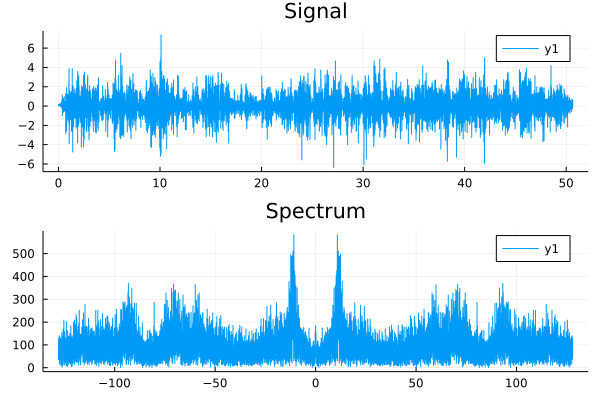

In [18]:
# Sampling rate in time from Ventura input data 
Ts = 0.00390625
# Sampling rate in frequency 
fs = 1.0/Ts 

# Fourier Transform of it
signal = readdata.left_Z
F = fft(signal)
F = fftshift(F)
freqs = fftfreq(12966, fs)
freqs = fftshift(freqs)

# plots in time and frequency domain 
p1 = time_domain = plot(readdata.Time, signal, title = "Signal")
p2 = freq_domain = plot(freqs, abs.(F), title = "Spectrum")
plot(p1,p2,layout=(2,1))

In [9]:
12965 * 0.00390625

50.64453125

## Section 5/: Power Density Spectrum 
Compute power-density spectrum from computed spectrum. Solve equation of motion symbolically. Compute auto-correlation. Take Fourier transform.

Auto-correlation of undamped vibration: [example](https://testbook.com/question-answer/the-autocorrelation-function-of-the-sinusoidal-sig--5f0ea1db8c72ef2f2d87e3ff). I have not yet found references for the damped case. A general reference is [NASA document](https://ntrs.nasa.gov/api/citations/20170005173/downloads/20170005173.pdf).

## References  
1. [random-vibration-testing by vibrationresearch](https://vibrationresearch.com/resources/what-is-random-vibration-testing/): good examples of power density spectral;
2. [power density spectrum on mass-spring-damper system](https://link.springer.com/content/pdf/10.1007%2F978-3-540-75553-1_21.pdf): nice introduction on power density spectrum on simplified examples; 
3. [wiki on spectral density](https://en.wikipedia.org/wiki/Spectral_density#Power_spectral_density): concept of power spectral density well explained; 